In [39]:
import numpy as np  
import struct  
import matplotlib.pyplot as plt

def load_mnist(images_path, labels_path):  
    # 读取标签  
    with open(labels_path, 'rb') as lbpath:  
        magic, num = struct.unpack('>II', lbpath.read(8))  
        labels = np.fromfile(lbpath, dtype=np.uint8)  

    # 读取图像  
    with open(images_path, 'rb') as imgpath:  
        magic, num, rows, cols = struct.unpack('>IIII', imgpath.read(16))  
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)  

    return images, labels  

# 指定 MNIST 数据集的路径  
train_images_path = 'mnist\\train-images.idx3-ubyte'  
train_labels_path = 'mnist\\train-labels.idx1-ubyte'  
test_images_path = 'mnist\\t10k-images.idx3-ubyte'  
test_labels_path = 'mnist\\t10k-labels.idx1-ubyte' 
# 加载数据  
images, labels = load_mnist(train_images_path, train_labels_path) 
images = images/255
test1,test2 = load_mnist(test_images_path,test_labels_path) 
test1 = test1/255

print('图像数据形状:', images.shape)  # (60000, 784)  
print('标签数据形状:', labels.shape)  # (60000,)
print(test2.size)

图像数据形状: (60000, 784)
标签数据形状: (60000,)
10000


In [49]:
class BP():
    def __init__(self):
        self.w1 = np.random.randn(28*28,128)
        self.b1 = np.random.randn(1,128)
        self.w2 = np.random.randn(128,256)
        self.b2 = np.random.randn(1,256)
        self.w3 = np.random.randn(256,10)
        self.b3 = np.random.randn(1,10)
        self.loss = 0

    def forward(self,x):
        self.out1 = np.dot(x,self.w1)+self.b1
        self.a1 = np.maximum(0,self.out1)
        self.out2 = np.dot(self.a1,self.w2)+self.b2
        self.a2 = np.tanh(self.out2)
        self.out3 = np.dot(self.a2,self.w3)+self.b3
        self.out = np.exp(self.out3)
        self.out = self.out/np.sum(self.out,axis=1,keepdims=True)
        return np.argmax(self.out,axis=1)
    
    def backword(self,x,y,train = True,learning_rate = 0.01,show = False):
        m = y.shape[0]  # 样本数量  
        y_onehot = np.zeros((m,10))  
        y_onehot[np.arange(m), y.flatten()] = 1  # 将y转为one-hot编码
        # 计算输出层误差  
        d_out = self.out - y_onehot  
        dw3 = np.dot(self.a2.T,d_out)/m
        db3 = np.sum(d_out, axis=0, keepdims=True) / m
        if train:
            # 反向传播到隐藏层  
            d_out2 = np.dot(d_out, self.w3.T)  
            d_out2 = d_out2 * (1 - np.tanh(self.out2)**2)  # tanh 的导数  

            # 计算权重2和偏置2的梯度  
            dw2 = np.dot(self.a1.T, d_out2) / m  
            db2 = np.sum(d_out2, axis=0, keepdims=True) / m  
            # 再反向传播到第一层  
            d_out1 = np.dot(d_out2, self.w2.T)  # 传播误差到输入层  
            d_out1 = d_out1 * (self.out1 > 0)  # ReLU 的导数  
            
            # 计算第一层的权重和偏置梯度  
            dw1 = np.dot(x.T, d_out1) / m  
            db1 = np.sum(d_out1, axis=0, keepdims=True) / m  
            
            # 更新参数  
            self.w1 -= learning_rate * dw1  
            self.b1 -= learning_rate * db1  
            self.w2 -= learning_rate * dw2  
            self.b2 -= learning_rate * db2  
            self.w3 -= learning_rate * dw3  
            self.b3 -= learning_rate * db3
        if show:
            temp1 = np.log(self.out).flatten()
            temp2 = y_onehot.flatten().T
            self.loss = -(np.dot(temp1,temp2)/m)  

            

In [16]:
def mini_batch_generator(x, y, batch_size):  #每次批量随机选取数据
    m = x.shape[0]  
    indices = np.arange(m)  
    np.random.shuffle(indices)  
    for start_idx in range(0, m, batch_size):  
        end_idx = min(start_idx + batch_size, m)  
        batch_indices = indices[start_idx:end_idx]  
        yield x[batch_indices], y[batch_indices]  

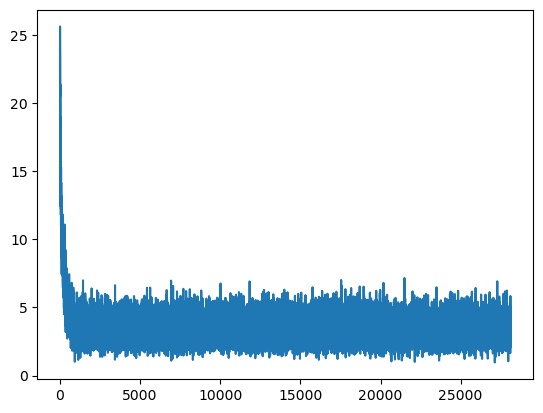

In [53]:
example = BP()
i = 0
loss_list =[]
lr=0.01
for epoch in range(30):
    lr = lr*(2**(-epoch*10))
    for x_batch, y_batch in mini_batch_generator(images, labels, 64):
        example.forward(x_batch)
        example.backword(x_batch,y_batch,show=True,learning_rate=lr)
        loss_list.append(example.loss)

        i+=1




plt.plot(range(i),loss_list)
plt.show()

In [54]:
result = example.forward(test1)
accuracy = np.sum(result == test2)/10000
print(accuracy)

0.6452
